In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
data = pd.read_csv("Scrapped watch data.csv")

In [89]:
data.head()

,Unnamed: 0,Price,Strap_color,Size_fits,Brand_Name,Screen_Size,Calling_System
0,0,1299,Black Strap,Free Size,Boult Drift,1.69,Yes
1,1,1399,Jet Black Strap,Free Size,Boult Drift+,1.85,Yes
2,2,1399,Black Strap,Regular,Noise Colorfit,1.80,No
3,3,1199,Black Strap,Free Size,Fastrack Revoltt,1.83,Yes
4,4,1099,Chocolate Brown Strap,Free Size,boAt Wave,1.83,No


In [90]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [91]:
data.head()

,Price,Strap_color,Size_fits,Brand_Name,Screen_Size,Calling_System
0,1299,Black Strap,Free Size,Boult Drift,1.69,Yes
1,1399,Jet Black Strap,Free Size,Boult Drift+,1.85,Yes
2,1399,Black Strap,Regular,Noise Colorfit,1.80,No
3,1199,Black Strap,Free Size,Fastrack Revoltt,1.83,Yes
4,1099,Chocolate Brown Strap,Free Size,boAt Wave,1.83,No


In [92]:
data.tail()

,Price,Strap_color,Size_fits,Brand_Name,Screen_Size,Calling_System
995,329,MULTICOLOR Strap,KIDS,windexa Led,NaN,No
996,2499,Black Strap,Free Size,Inbase FIT,1.78,No
997,2499,Space Grey Strap,Free Size,Urban FIT,1.78,Yes
998,879,Black Strap,Regular,Medulla MD,NaN,No
999,699,Black Strap,Free Size,maxphony T800,NaN,No


In [93]:
data.sample(5)

,Price,Strap_color,Size_fits,Brand_Name,Screen_Size,Calling_System
949,2394,Black Strap,FREE SIZE,FUK Wave,NaN,No
989,879,Black Strap,Regular,WOKIT WKT-,NaN,No
538,1499,Black Strap,Free Size,Digniti T55,NaN,No
7,1399,Black Coffee Strap,Free Size,Boult Drift+,1.85,Yes
345,330,NA Strap,Mens,RHYLOZ Digital,NaN,No


#### Dataset is not biased.

## Understanding the dataset :

In [94]:
data.shape

(1000, 6)

In [95]:
data.size

6000

In [96]:
data.isnull().sum()

Price               0
Strap_color         0
Size_fits           0
Brand_Name          0
Screen_Size       471
Calling_System      0
dtype: int64

In [97]:
data.drop_duplicates(inplace=True)

In [98]:
data.shape

(583, 6)

In [99]:
data["Screen_Size"].mode()[0]

1.85

In [100]:
data["Screen_Size"] = data["Screen_Size"].fillna(1.85)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 0 to 998
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Price           583 non-null    int64  
 1   Strap_color     583 non-null    object 
 2   Size_fits       583 non-null    object 
 3   Brand_Name      583 non-null    object 
 4   Screen_Size     583 non-null    float64
 5   Calling_System  583 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.9+ KB


In [102]:
### Chceking the outliers:\

data.describe()

,Price,Screen_Size
count,583.000000,583.000000
mean,1666.670669,4.592521
std,3800.218908,10.285248
min,0.000000,1.300000
25%,664.000000,1.850000
50%,999.000000,1.850000
75%,1589.000000,1.850000
max,54999.000000,51.800000


<Axes: ylabel='Price'>

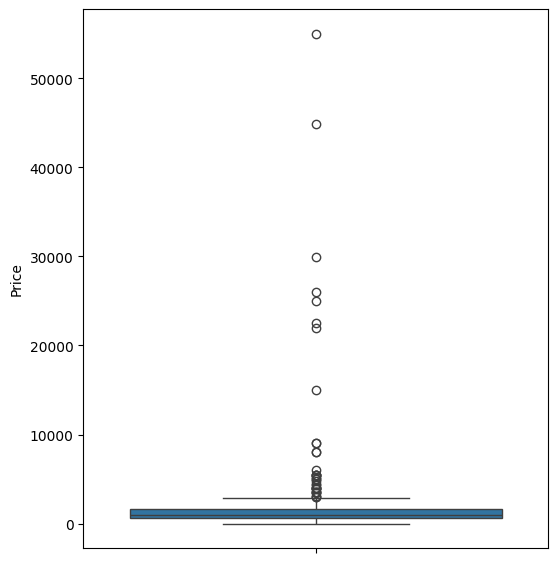

In [103]:
plt.figure(figsize=(6,7))

sns.boxplot(data["Price"])

In [104]:
q1 = data["Price"].quantile(0.25)
q3 = data["Price"].quantile(0.75)

iqr = q3-q1

In [105]:
min_range = q1 + 1.5*iqr
max_range = q3 - 1.5*iqr

In [106]:
data = data[(data["Price"] <= min_range) & (data["Price"] >= max_range)]

In [107]:
data.shape

(495, 6)

In [108]:
data.describe()

,Price,Screen_Size
count,495.000000,495.000000
mean,1013.793939,4.527515
std,447.644661,10.130515
min,210.000000,1.300000
25%,649.500000,1.850000
50%,879.000000,1.850000
75%,1399.000000,1.850000
max,2041.000000,51.100000


In [109]:
data

,Price,Strap_color,Size_fits,Brand_Name,Screen_Size,Calling_System
0,1299,Black Strap,Free Size,Boult Drift,1.69,Yes
1,1399,Jet Black Strap,Free Size,Boult Drift+,1.85,Yes
2,1399,Black Strap,Regular,Noise Colorfit,1.80,No
3,1199,Black Strap,Free Size,Fastrack Revoltt,1.83,Yes
4,1099,Chocolate Brown Strap,Free Size,boAt Wave,1.83,No
...,...,...,...,...,...,...
985,879,Gold Strap,Regular,DEEP GLOBAL,1.85,No
987,1399,Yellow Strap,Free Size,Boult Crown,1.95,Yes
992,1549,Black Strap,Free Size,PS COLLECTION,1.85,No
993,549,black Strap,Free Size,SAMSTAR COLLECTION,1.85,No


In [110]:
backup = data.to_csv("Cleaned watch data.csv")

### Data Visualization :

<Axes: ylabel='Price'>

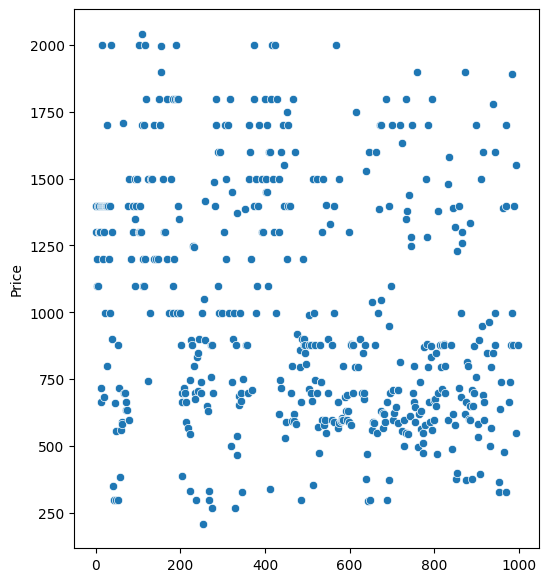

In [111]:
plt.figure(figsize=(6,7))

sns.scatterplot(data["Price"])

## Model Training: 

In [112]:
X = data.drop(columns = "Price")

In [113]:
y = data["Price"]

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [115]:
from sklearn.preprocessing import LabelEncoder
ler  = LabelEncoder()

In [116]:
encoded_strap = ler.fit_transform(X["Strap_color"])
X["Strap_color"] = encoded_strap

In [117]:
encoded_size = ler.fit_transform(X["Size_fits"])
X["Size_fits"] = encoded_size

In [118]:
encoded_brand = ler.fit_transform(X["Brand_Name"])
X["Brand_Name"] = encoded_brand

In [119]:
encoded_calling = ler.fit_transform(X["Calling_System"])
X["Calling_System"] = encoded_calling

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)

In [121]:
print(X)
print(y)

     Strap_color  Size_fits  Brand_Name  Screen_Size  Calling_System
0              9         32          23         1.69               1
1             52         32          24         1.85               1
2              9         43         150         1.80               0
3              9         32          68         1.83               1
4             18         32         271         1.83               0
..           ...        ...         ...          ...             ...
985           42         43          43         1.85               0
987           93         32          20         1.95               1
992            9         32         167         1.85               0
993           95         32         190         1.85               0
998            9         43         129         1.85               0

[495 rows x 5 columns]
0      1299
1      1399
2      1399
3      1199
4      1099
       ... 
985     879
987    1399
992    1549
993     549
998     879
Name: Price, Len

In [122]:
lr = LinearRegression()
dr = DecisionTreeRegressor()
rfre = RandomForestRegressor()

In [123]:
lr.fit(X_train,y_train)

LinearRegression()

In [124]:
dr.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
rfre.fit(X_train, y_train)

RandomForestRegressor()

In [126]:
print("LR Training accuracy:- ", lr.score(X_train,y_train)*100, "LR Training accuracy:- ", lr.score(X_test,y_test)*100)
print("DTR Training accuracy:- ", dr.score(X_train,y_train)*100, "DTR Training accuracy:- ", dr.score(X_test,y_test)*100)
print("RFR Training accuracy:- ", rfre.score(X_train,y_train)*100, "RFR Training accuracy:- ", rfre.score(X_test,y_test)*100)

LR Training accuracy:-  21.322487262153345 LR Training accuracy:-  16.30095256491706
DTR Training accuracy:-  99.05678112457437 DTR Training accuracy:-  34.07159785949224
RFR Training accuracy:-  93.59930368909775 RFR Training accuracy:-  50.807529191395574


###  RandomForestRegressor -- It shows good accuracy.

In [127]:
import joblib

In [128]:
joblib.dump(rfre, "Watch model.lb")

['Watch model.lb']